In [86]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [212]:
import data_processing as dp

In [213]:
# Define some parameters
pv = 122
onshore = 80
offshore = 13

In [272]:
data_clean = pd.read_csv('../data/data_clean3.csv', sep=';', parse_dates=['Datetime']).set_index('Datetime')
prodSol = pd.read_csv('../data/prod/prodSol.csv', sep=';', parse_dates=['Datetime']).set_index('Datetime')
prodEol = pd.read_csv('../data/prod/prodEol.csv', sep=';', parse_dates=['Datetime']).set_index('Datetime')
prodRiv = pd.read_csv('../data/prod/prodRiv.csv', sep=';', parse_dates=['Datetime']).set_index('Datetime')

In [273]:
prodSol

,Solaire (TW)
Datetime,
2012-01-01 00:00:00,0.000000
2012-01-01 00:15:00,0.000000
2012-01-01 00:30:00,0.000000
2012-01-01 00:45:00,0.000000
2012-01-01 01:00:00,0.000000
...,...
2023-05-12 22:45:00,0.493231
2023-05-12 23:00:00,0.493231
2023-05-12 23:15:00,0.493231


In [274]:
data = pd.merge(data_clean, (prodSol*pv).merge((prodEol*(offshore+onshore)).merge(prodRiv,on='Datetime'),on='Datetime'),on='Datetime')
data

,Pression au niveau mer,Variation de pression en 3 heures,Température,Humidité,Consommation (MW),Holiday,A,B,C,Confinement,Prévision J (MW),Prévision J-1 (MW),week-end,Prix Elec 1kWh,Solaire (TW),Eolien (TW),Hydraulique (MW)
Datetime,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,101912.1325,-26.204878,284.441001,90.875456,56231.0,True,True,True,True,0,55100,55200,1,69.37,0.000000,63.768199,7598.0
2012-01-01 01:15:00,101909.5278,-26.399241,284.418138,91.010688,56153.0,True,True,True,True,0,55250,55600,1,69.37,0.000000,63.678029,7448.5
2012-01-01 01:30:00,101906.9230,-26.593603,284.395274,91.145920,56075.0,True,True,True,True,0,55400,56000,1,69.37,0.000000,63.587859,7299.0
2012-01-01 01:45:00,101904.3182,-26.787965,284.372410,91.281152,55803.5,True,True,True,True,0,55200,56000,1,69.37,0.000000,63.669012,7229.0
2012-01-01 02:00:00,101901.7134,-26.982327,284.349546,91.416384,55532.0,True,True,True,True,0,55000,56000,1,69.37,0.000000,63.750165,7159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 13:45:00,101690.4182,-5.555157,288.633609,67.142344,48632.0,False,False,False,False,0,48350,49900,0,104.08,85.847085,35.917932,6661.0
2023-05-10 14:00:00,101688.5445,-11.812752,288.791610,66.369890,48073.0,False,False,False,False,0,48300,49700,0,104.08,83.554008,37.196585,6695.0
2023-05-10 14:15:00,101683.9215,-15.072847,288.828798,66.207288,48427.0,False,False,False,False,0,47850,49600,0,104.08,86.745207,39.156329,6784.0


In [216]:
data['Annee'] = data.index.year
data['Mois'] = data.index.month
data['Jour'] = data.index.day
data['Heure'] = data.index.hour
data['Minute'] = data.index.minute
data

,Pression au niveau mer,Variation de pression en 3 heures,Température,Humidité,Consommation (MW),Holiday,A,B,C,Confinement,...,week-end,Prix Elec 1kWh,Solaire (MW),Eolien (MW),Hydraulique (MW),Annee,Mois,Jour,Heure,Minute
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,101912.1325,-26.204878,284.441001,90.875456,56231.0,True,True,True,True,0,...,1,69.37,0.000000,63.768199,7598.0,2012,1,1,1,0
2012-01-01 01:15:00,101909.5278,-26.399241,284.418138,91.010688,56153.0,True,True,True,True,0,...,1,69.37,0.000000,63.678029,7448.5,2012,1,1,1,15
2012-01-01 01:30:00,101906.9230,-26.593603,284.395274,91.145920,56075.0,True,True,True,True,0,...,1,69.37,0.000000,63.587859,7299.0,2012,1,1,1,30
2012-01-01 01:45:00,101904.3182,-26.787965,284.372410,91.281152,55803.5,True,True,True,True,0,...,1,69.37,0.000000,63.669012,7229.0,2012,1,1,1,45
2012-01-01 02:00:00,101901.7134,-26.982327,284.349546,91.416384,55532.0,True,True,True,True,0,...,1,69.37,0.000000,63.750165,7159.0,2012,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 13:45:00,101690.4182,-5.555157,288.633609,67.142344,48632.0,False,False,False,False,0,...,0,104.08,85.847085,35.917932,6661.0,2023,5,10,13,45
2023-05-10 14:00:00,101688.5445,-11.812752,288.791610,66.369890,48073.0,False,False,False,False,0,...,0,104.08,83.554008,37.196585,6695.0,2023,5,10,14,0
2023-05-10 14:15:00,101683.9215,-15.072847,288.828798,66.207288,48427.0,False,False,False,False,0,...,0,104.08,86.745207,39.156329,6784.0,2023,5,10,14,15


In [81]:
# prixElec = pd.read_csv('../data/PrixElec.csv', sep=';')

In [95]:
data_clean['Annee'] = data_clean.index.year

# Supposons que vous avez les données dans un DataFrame appelé 'prix_data'
prix_data = pd.read_csv('../data/PrixElec.csv', sep=';')  # Charger les données depuis un fichier CSV

# Créer un dictionnaire de correspondance entre l'année et le prix
prix_dict = prix_data.set_index('Annee')['Prix pour 1kWh dans un contrat 3kW'].to_dict()

# Ajouter les valeurs de prix correspondantes dans une nouvelle colonne 'Prix Elec 1kWh'
data_clean['Prix Elec 1kWh'] = data_clean['Annee'].map(prix_dict)

In [105]:
#data.to_csv('../data/data_clean2.csv', sep=';')
#data_clean.drop('Annee', axis=1, inplace=True)
#data_clean.to_csv('../data/data_clean3.csv', sep=';')
data_clean

,Pression au niveau mer,Variation de pression en 3 heures,Température,Humidité,Consommation (MW),Holiday,A,B,C,Confinement,Prévision J (MW),Prévision J-1 (MW),week-end,Prix Elec 1kWh
Datetime,,,,,,,,,,,,,,
2012-01-01 01:00:00,101912.1325,-26.204878,284.441001,90.875456,56231.0,True,True,True,True,0,55100,55200,1,69.37
2012-01-01 01:15:00,101909.5278,-26.399241,284.418138,91.010688,56153.0,True,True,True,True,0,55250,55600,1,69.37
2012-01-01 01:30:00,101906.9230,-26.593603,284.395274,91.145920,56075.0,True,True,True,True,0,55400,56000,1,69.37
2012-01-01 01:45:00,101904.3182,-26.787965,284.372410,91.281152,55803.5,True,True,True,True,0,55200,56000,1,69.37
2012-01-01 02:00:00,101901.7134,-26.982327,284.349546,91.416384,55532.0,True,True,True,True,0,55000,56000,1,69.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 13:45:00,101690.4182,-5.555157,288.633609,67.142344,48632.0,False,False,False,False,0,48350,49900,0,104.08
2023-05-10 14:00:00,101688.5445,-11.812752,288.791610,66.369890,48073.0,False,False,False,False,0,48300,49700,0,104.08
2023-05-10 14:15:00,101683.9215,-15.072847,288.828798,66.207288,48427.0,False,False,False,False,0,47850,49600,0,104.08


In [217]:
data['Production Residuelle (MW)'] = dp.prodRes(Conso=data['Consommation (MW)'], prodEol=data['Eolien (MW)'], prodSol=data['Solaire (MW)'], prodRiv=data['Hydraulique (MW)'],pv=1, onshore=1, offshore=1)

In [218]:
data

,Pression au niveau mer,Variation de pression en 3 heures,Température,Humidité,Consommation (MW),Holiday,A,B,C,Confinement,...,Prix Elec 1kWh,Solaire (MW),Eolien (MW),Hydraulique (MW),Annee,Mois,Jour,Heure,Minute,Production Residuelle (MW)
Datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,101912.1325,-26.204878,284.441001,90.875456,56231.0,True,True,True,True,0,...,69.37,0.000000,63.768199,7598.0,2012,1,1,1,0,78903.398418
2012-01-01 01:15:00,101909.5278,-26.399241,284.418138,91.010688,56153.0,True,True,True,True,0,...,69.37,0.000000,63.678029,7448.5,2012,1,1,1,15,78651.558488
2012-01-01 01:30:00,101906.9230,-26.593603,284.395274,91.145920,56075.0,True,True,True,True,0,...,69.37,0.000000,63.587859,7299.0,2012,1,1,1,30,78399.718558
2012-01-01 01:45:00,101904.3182,-26.787965,284.372410,91.281152,55803.5,True,True,True,True,0,...,69.37,0.000000,63.669012,7229.0,2012,1,1,1,45,78763.524495
2012-01-01 02:00:00,101901.7134,-26.982327,284.349546,91.416384,55532.0,True,True,True,True,0,...,69.37,0.000000,63.750165,7159.0,2012,1,1,2,0,79127.330432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 13:45:00,101690.4182,-5.555157,288.633609,67.142344,48632.0,False,False,False,False,0,...,104.08,85.847085,35.917932,6661.0,2023,5,10,13,45,115711.948953
2023-05-10 14:00:00,101688.5445,-11.812752,288.791610,66.369890,48073.0,False,False,False,False,0,...,104.08,83.554008,37.196585,6695.0,2023,5,10,14,0,116569.176900
2023-05-10 14:15:00,101683.9215,-15.072847,288.828798,66.207288,48427.0,False,False,False,False,0,...,104.08,86.745207,39.156329,6784.0,2023,5,10,14,15,123414.864377


In [219]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Normalisation pour les autres colonnes
data_normal = scaler.fit_transform(data.drop(columns=['Annee']))

# Normalisation personnalisée pour la colonne 'Annee'
annee_min = 2000
annee_max = 2100
annee_normal = (data['Annee'] - annee_min) / (annee_max - annee_min) * 2 - 1

# Concaténer les données normalisées des autres colonnes avec la colonne 'Annee' normalisée
data_scaled = np.hstack((data_normal, annee_normal.to_numpy().reshape(-1, 1)))


In [220]:
data_scaled

array([[ 0.17452643, -0.24595539, -0.05556952, ..., -1.        ,
         0.81728058, -0.76      ],
       [ 0.17181608, -0.24773119, -0.0578493 , ..., -0.33333333,
         0.81346728, -0.76      ],
       [ 0.16910563, -0.24950698, -0.06012909, ...,  0.33333333,
         0.80965398, -0.76      ],
       ...,
       [-0.06294111, -0.14424735,  0.38194678, ..., -0.33333333,
         1.49126202, -0.54      ],
       [-0.06775152, -0.17403328,  0.38565486, ...,  0.33333333,
         1.49965633, -0.54      ],
       [-0.07256203, -0.20381922,  0.38936296, ...,  1.        ,
         1.46933667, -0.54      ]])

# Permet de retransformer mon scaled_data en original data sur une ligne :

In [221]:
original_data = np.hstack((scaler.inverse_transform(data_scaled[:,:-1]), ((data_scaled[:,-1] + 1) * (annee_max - annee_min) / 2 + annee_min).reshape(-1,1)))

In [222]:
original_data

array([[ 1.01912133e+05, -2.62048783e+01,  2.84441001e+02, ...,
         0.00000000e+00,  7.89033984e+04,  2.01200000e+03],
       [ 1.01909528e+05, -2.63992405e+01,  2.84418138e+02, ...,
         1.50000000e+01,  7.86515585e+04,  2.01200000e+03],
       [ 1.01906923e+05, -2.65936028e+01,  2.84395274e+02, ...,
         3.00000000e+01,  7.83997186e+04,  2.01200000e+03],
       ...,
       [ 1.01683921e+05, -1.50728472e+01,  2.88828798e+02, ...,
         1.50000000e+01,  1.23414864e+05,  2.02300000e+03],
       [ 1.01679299e+05, -1.83329427e+01,  2.88865986e+02, ...,
         3.00000000e+01,  1.23969246e+05,  2.02300000e+03],
       [ 1.01674676e+05, -2.15930382e+01,  2.88903174e+02, ...,
         4.50000000e+01,  1.21966858e+05,  2.02300000e+03]])

# Ajustement du self._state

In [171]:
lake_inflows = [1.3642965, 1.917242, 1.8321275, 1.418871, 1.0358125, 1.5900905, 1.1641765, 0.9302595,
                             1.053223, 0.9381, 0.861544, 1.7097345]

In [199]:
current_index = 0
max_index = len(data_scaled) - 96
current_index = max_index
print(max_index)
"""state = np.concatenate((
            [np.random.rand(), np.random.rand(), np.random.rand() * .2, lake_inflows[0] / 2000],
            # Rajouter les 96 prévisions,
            data_scaled[current_index, :]
        ))"""

399512


In [200]:
# state

array([ 3.88382668e-01,  8.05395340e-03,  1.49664686e-01,  6.82148250e-04,
       -3.24413564e-01, -5.74259980e-01,  4.40269761e-01,  3.09007960e-01,
       -2.97176128e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.84023669e-01, -2.32352941e-01,
        0.00000000e+00,  7.63203463e-01,  1.16253255e+00,  2.74530652e-01,
       -1.75824176e-01, -1.66666667e-01, -4.66666667e-01,  3.33333333e-01,
       -1.00000000e+00, -5.40000000e-01])

In [201]:
values = data_scaled[current_index:current_index+96,10]

In [202]:
values

array([-0.28402367, -0.29881657, -0.31360947, -0.34023669, -0.36686391,
       -0.38461538, -0.40236686, -0.41420118, -0.4260355 , -0.44970414,
       -0.47337278, -0.44674556, -0.42011834, -0.41420118, -0.40828402,
       -0.35798817, -0.30769231, -0.30769231, -0.30769231, -0.33431953,
       -0.36094675, -0.40236686, -0.44378698, -0.46449704, -0.4852071 ,
       -0.5       , -0.5147929 , -0.50591716, -0.49704142, -0.50591716,
       -0.5147929 , -0.4704142 , -0.4260355 , -0.42307692, -0.42011834,
       -0.49704142, -0.5739645 , -0.6183432 , -0.66272189, -0.71597633,
       -0.76923077, -0.75443787, -0.73964497, -0.75443787, -0.76923077,
       -0.80473373, -0.84023669, -0.87278107, -0.90532544, -0.92899408,
       -0.95266272, -0.9704142 , -0.98816568, -0.99112426, -0.99408284,
       -0.9852071 , -0.97633136, -0.93786982, -0.89940828, -0.84911243,
       -0.79881657, -0.75443787, -0.71005917, -0.65088757, -0.59171598,
       -0.52071006, -0.44970414, -0.40236686, -0.35502959, -0.31

In [206]:
state = np.concatenate((
            [np.random.rand(), np.random.rand(), np.random.rand() * .2, lake_inflows[0] / 2000],
            data_scaled[current_index:current_index+96,10],
            data_scaled[current_index, :]
))

In [207]:
state

array([ 2.48625823e-01,  6.12288493e-01,  1.08775934e-02,  6.82148250e-04,
       -2.84023669e-01, -2.98816568e-01, -3.13609467e-01, -3.40236686e-01,
       -3.66863905e-01, -3.84615385e-01, -4.02366864e-01, -4.14201183e-01,
       -4.26035503e-01, -4.49704142e-01, -4.73372781e-01, -4.46745562e-01,
       -4.20118343e-01, -4.14201183e-01, -4.08284024e-01, -3.57988166e-01,
       -3.07692308e-01, -3.07692308e-01, -3.07692308e-01, -3.34319527e-01,
       -3.60946746e-01, -4.02366864e-01, -4.43786982e-01, -4.64497041e-01,
       -4.85207101e-01, -5.00000000e-01, -5.14792899e-01, -5.05917160e-01,
       -4.97041420e-01, -5.05917160e-01, -5.14792899e-01, -4.70414201e-01,
       -4.26035503e-01, -4.23076923e-01, -4.20118343e-01, -4.97041420e-01,
       -5.73964497e-01, -6.18343195e-01, -6.62721893e-01, -7.15976331e-01,
       -7.69230769e-01, -7.54437870e-01, -7.39644970e-01, -7.54437870e-01,
       -7.69230769e-01, -8.04733728e-01, -8.40236686e-01, -8.72781065e-01,
       -9.05325444e-01, -

# Dénormaliser une seul colonne de mon ndarary normalisé avec RobustScaler()
pas possible => utilisation de self.data (data frame non normalisé)

In [224]:
prodRes = scaler.inverse_transform(data_scaled[:,:-1])

ValueError: non-broadcastable output operand with shape (399608,1) doesn't match the broadcast shape (399608,22)

In [226]:
pasTemp = data['Minute'][current_index-1] - data['Minute'][current_index - 2]
print(pasTemp)

15


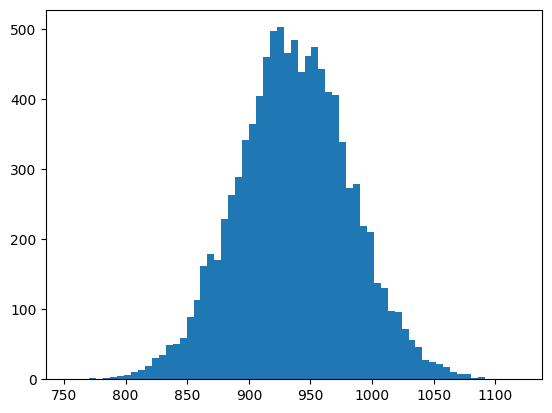

In [246]:
plt.hist(np.random.normal(937,0.05*937,10000), bins='auto')
plt.show()

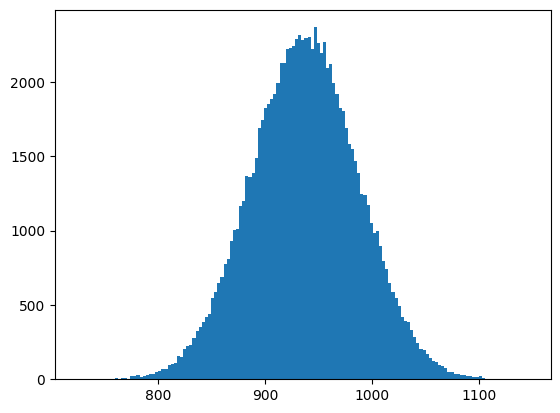

In [252]:
plt.hist(np.random.normal(937,50,100000), bins='auto')
plt.show()

In [ ]:
np.size(
    [[ 9.78989780e-01,  5.81352174e-01,  9.16908011e-02,
         6.82148268e-04,  2.01183438e-01,  2.10059166e-01,
         2.18934909e-01,  2.07100585e-01,  1.95266277e-01,
         1.53846160e-01,  1.12426035e-01,  3.84615399e-02,
        -3.55029590e-02, -9.17159766e-02, -1.47928998e-01,
        -1.95266277e-01, -2.42603555e-01, -2.78106511e-01,
        -3.13609481e-01, -3.34319532e-01, -3.55029583e-01,
        -3.69822472e-01, -3.84615391e-01, -3.96449715e-01,
        -4.08284038e-01, -4.11242604e-01, -4.14201170e-01,
        -4.20118332e-01, -4.26035494e-01, -4.26035494e-01,
        -4.26035494e-01, -4.20118332e-01, -4.14201170e-01,
        -4.23076928e-01, -4.31952655e-01, -4.26035494e-01,
        -4.20118332e-01, -3.90532553e-01, -3.60946745e-01,
        -3.37278098e-01, -3.13609481e-01, -2.84023672e-01,
        -2.54437864e-01, -2.36686394e-01, -2.18934909e-01,
        -1.89349115e-01, -1.59763306e-01, -1.30177513e-01,
        -1.00591719e-01, -5.32544367e-02, -5.91715984e-03,
         3.25443782e-02,  7.10059181e-02,  2.36686394e-02,
        -2.36686394e-02, -6.50887564e-02, -1.06508873e-01,
        -1.24260359e-01, -1.42011836e-01, -1.77514791e-01,
        -2.13017747e-01, -2.27810651e-01, -2.42603555e-01,
        -2.60355026e-01, -2.78106511e-01, -2.75147915e-01,
        -2.72189349e-01, -2.39644974e-01, -2.07100585e-01,
        -1.36094674e-01, -6.50887564e-02,  1.77514795e-02,
         1.00591719e-01,  1.39053255e-01,  1.77514791e-01,
         2.18934909e-01,  2.60355026e-01,  2.69230783e-01,
         2.78106511e-01,  2.84023672e-01,  2.89940834e-01,
         2.72189349e-01,  2.54437864e-01,  2.36686394e-01,
         2.18934909e-01,  1.74556211e-01,  1.30177513e-01,
         9.76331383e-02,  6.50887564e-02,  1.03550293e-01,
         1.42011836e-01,  2.01183438e-01,  2.60355026e-01,
         2.15976328e-01,  1.71597630e-01,  1.39053255e-01,
         1.30177513e-01,  7.69230798e-02,  2.36686394e-02,
        -4.43786979e-02,  1.74526423e-01, -2.45955393e-01,
        -5.55695146e-02,  7.12784350e-01,  2.48034939e-01,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.01183438e-01,
         2.02941179e-01,  1.00000000e+00,  1.19047621e-02,
        -1.49933910e-02,  1.41854632e+00,  1.98051944e-01,
         8.17280591e-01, -8.33333313e-01, -1.00000000e+00,
        -8.33333313e-01, -1.00000000e+00, -7.59999990e-01]]
)